## Basic Classification Models: Logistic Regression and Decision Tree

In this notebook, we will develop and evaluate two basic classification models: Logistic Regression and Decision Tree. These models will be trained on the previously prepared training data and validated using the validation set.

### Objectives:
1. **Load the Prepared Data:**
   - We will load the normalized training and validation data from the `.npz` files created in the data preparation step.
  
2. **Model Development:**
   - We will develop two basic classification models:
     - **Logistic Regression:** A linear model that estimates probabilities using a logistic function.
     - **Decision Tree:** A non-linear model that splits the data into branches to make predictions based on feature values.

3. **Model Evaluation:**
   - Evaluate the models using common classification metrics such as accuracy, precision, recall, and F1-score on the validation set.
   - Compare the performance of the two models to understand their strengths and weaknesses in this specific classification task.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [5]:
RANDOM_STATE = 10101010

In [2]:
# Load the data from the npz file
data = np.load('normalized_data.npz')

# Extract the training and validation data
X_train_scaled = data['X_train_scaled']
y_train = data['y_train']
X_val_scaled = data['X_val_scaled']
y_val = data['y_val']

# Optional: Check the shapes of the loaded data to ensure correctness
print("Training data shape:", X_train_scaled.shape)
print("Validation data shape:", X_val_scaled.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training data shape: (341, 30)
Validation data shape: (114, 30)
Training labels shape: (341,)
Validation labels shape: (114,)


## Developing a Logistic Regression Model

Logistic Regression is a simple yet powerful linear model used for binary classification tasks. In this section, we will develop a Logistic Regression model using the training data and evaluate its performance on the validation set. The key steps include:

1. **Model Initialization:**
   - We will initialize the Logistic Regression model with default parameters.
  
2. **Model Training:**
   - The model will be trained on the scaled training data (`X_train_scaled`) and the corresponding labels (`y_train`).
  
3. **Model Evaluation:**
   - After training, we will evaluate the model's performance on the validation set (`X_val_scaled`, `y_val`) using various metrics such as accuracy, precision, recall, and F1-score.

This model will serve as a baseline for further comparisons with more complex models, like Decision Trees, which we will develop next.


In [6]:
# 1. Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=RANDOM_STATE)

# 2. Train the model on the training data
log_reg.fit(X_train_scaled, y_train)

# 3. Make predictions on the validation set
y_val_pred = log_reg.predict(X_val_scaled)

# 4. Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.9912
Precision: 0.9861
Recall: 1.0000
F1-Score: 0.9930

Confusion Matrix:
 [[42  1]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Insights from Logistic Regression Model Performance

The Logistic Regression model demonstrated strong performance on the validation set, as evidenced by the following metrics:

1. **Accuracy:** The model achieved an accuracy of 99.12%, meaning it correctly classified 99.12% of the samples in the validation set. This high accuracy indicates that the model is well-suited for this classification task.

2. **Precision and Recall:**
   - **Precision (0.9861):** The model’s precision indicates that 98.61% of the predictions labeled as malignant (class 1) were actually malignant. This high precision is critical in medical diagnoses, where false positives (incorrectly labeling a benign tumor as malignant) need to be minimized.
   - **Recall (1.0000):** The recall value of 1.0000 shows that the model successfully identified all malignant cases, meaning there were no false negatives. This is particularly important in cancer diagnosis, where failing to detect a malignant tumor could have severe consequences.

3. **F1-Score (0.9930):** The F1-Score, which balances precision and recall, is 0.9930, reflecting the model’s overall excellent performance.

4. **Confusion Matrix:**
   - The confusion matrix indicates that the model correctly classified 42 out of 43 benign tumors (class 0) and all 71 malignant tumors (class 1). The single misclassification occurred in predicting one benign tumor as malignant, which is less critical than missing a malignant case.

5. **Classification Report:**
   - The detailed classification report confirms that the model performs well across both classes, with high precision, recall, and F1-scores. The macro and weighted averages are also very close to 1.0, showing balanced performance across the dataset.

### Conclusion:
The Logistic Regression model provides a robust baseline for tumor classification with near-perfect recall and precision. The model's ability to correctly identify all malignant cases makes it particularly valuable in a medical context, where the cost of false negatives is high. Given these results, Logistic Regression could be a strong candidate for deployment or further tuning. However, we will continue to explore more complex models, like Decision Trees, to see if they can offer any additional improvements.


## Understanding Hyperparameters in Logistic Regression

### What Are Hyperparameters?

Hyperparameters in machine learning models are settings or configurations that are set before the learning process begins. Unlike model parameters, which are learned from the data (like the weights in Logistic Regression), hyperparameters are predefined and control aspects of the learning process. Adjusting hyperparameters can significantly impact a model's performance, making it crucial to understand when and how to optimize them.

### Key Hyperparameters in Logistic Regression:

1. **penalty ('l2'):**
   - **Intuitive Example:** Imagine you have a complex problem with many possible solutions. The penalty is like a rule that penalizes overly complex solutions. In Logistic Regression, the penalty helps prevent the model from becoming too complex and overfitting the data.
   - **When to Optimize:** If your model is overfitting, experimenting with different penalties (like 'l1' for Lasso or 'l2' for Ridge) can help regularize the model and improve generalization.

2. **C (1.0):**
   - **Intuitive Example:** Think of `C` as a lever that balances fitting the training data perfectly and keeping the model simple. A high `C` value puts more emphasis on fitting the data (less regularization), while a low `C` value enforces more regularization.
   - **When to Optimize:** Adjust `C` when you suspect that the model is either underfitting (increase `C`) or overfitting (decrease `C`).

3. **solver ('lbfgs'):**
   - **Intuitive Example:** The solver is like the method you choose to solve a math problem. Some methods might be faster, while others might be more precise. In Logistic Regression, the solver determines the optimization algorithm used to find the best model parameters.
   - **When to Optimize:** If the dataset is large or if you're using regularization techniques, experimenting with different solvers (like 'liblinear', 'saga', 'newton-cg') can lead to faster convergence or better performance.

4. **max_iter (100):**
   - **Intuitive Example:** Imagine you're solving a puzzle, and `max_iter` is the number of attempts you're allowed to make. If you haven't solved it within this limit, you stop trying. In Logistic Regression, this parameter sets the maximum number of iterations the solver can use.
   - **When to Optimize:** If the solver fails to converge, increasing `max_iter` can allow more time for the model to find the best solution.

5. **tol (0.0001):**
   - **Intuitive Example:** Think of `tol` as the threshold for improvement. If changes in the model parameters fall below this threshold, the training process will stop. It's like deciding not to spend more time on a puzzle if you're only making tiny improvements.
   - **When to Optimize:** If the training process stops too early, reducing `tol` might help the model converge to a better solution.

6. **class_weight (None):**
   - **Intuitive Example:** Imagine you’re evaluating a test, but some questions are more important than others. `class_weight` allows you to assign different importance to different classes (e.g., giving more weight to the malignant class in a cancer dataset).
   - **When to Optimize:** If the dataset is imbalanced, setting `class_weight='balanced'` can help the model pay more attention to the minority class.

### When Does It Make Sense to Optimize Hyperparameters?

Optimizing hyperparameters is particularly useful when:

- **Overfitting or Underfitting:** If the model performs very well on the training data but poorly on unseen data, or if it performs poorly on both, hyperparameter tuning can help balance bias and variance.
- **Imbalanced Datasets:** When the classes are not equally represented, optimizing parameters like `class_weight` can improve the model's sensitivity to the minority class.
- **Performance Bottlenecks:** If the model is taking too long to converge or is not converging at all, adjusting `solver`, `max_iter`, or `tol` can improve performance.



In [17]:
feature_names = pd.read_excel('brest_cancer_data.xlsx').columns[1:-1]

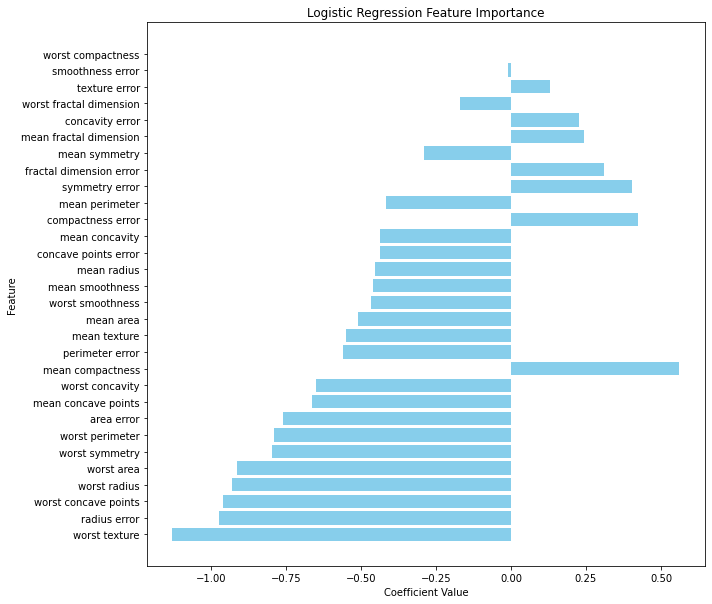

In [20]:
coefficients = log_reg.coef_[0]

# Combine feature names and coefficients into a list of tuples and sort by magnitude
coef_feature_pairs = sorted(zip(coefficients, feature_names), key=lambda x: np.abs(x[0]), reverse=True)

# Unzip the sorted pairs
sorted_coefficients, sorted_feature_names = zip(*coef_feature_pairs)

# Create a bar plot
plt.figure(figsize=(10, 10))
plt.barh(sorted_feature_names, sorted_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')
plt.show()

## Insights from Logistic Regression Feature Importance

The bar plot provides valuable insights into how the Logistic Regression model makes decisions by analyzing the importance of each feature. Here are the key takeaways:

1. **Positive and Negative Coefficients:**
   - **Positive Coefficients:** Features with positive coefficients (bars pointing to the right) increase the probability that the model will predict the tumor as malignant. These features are positively correlated with malignancy.
   - **Negative Coefficients:** Features with negative coefficients (bars pointing to the left) decrease the likelihood of predicting malignancy. These features are negatively correlated with malignancy, meaning higher values suggest a benign tumor.

2. **Most Influential Features:**
   - **`worst texture`, `radius error`, `worst concave points`:** These features have the most significant negative coefficients, indicating that they are crucial for predicting benign tumors. Higher values in these features are strongly associated with a benign classification.
   - **`mean compactness`:** This feature stands out with the largest positive coefficient, making it a strong indicator of malignancy. Higher values of `mean compactness` significantly increase the likelihood of the tumor being malignant.

3. **Magnitude of Coefficients:**
   - The magnitude of each coefficient reflects the strength of the feature's impact on the prediction. Features with longer bars have a more substantial influence on the model's decisions, either driving the prediction towards malignancy or benignity.

### Conclusion:
Understanding the weights of the Logistic Regression model through this visualization helps identify the most critical features influencing the predictions. Features like `worst texture` and `mean compactness` play pivotal roles in determining whether a tumor is likely to be benign or malignant. This insight is not only crucial for model interpretation but also for refining the feature selection process and improving the model's accuracy in real-world applications.


## Developing a Decision Tree Model

In this section, we will develop a Decision Tree model for classifying breast cancer tumors. Decision Trees are non-linear models that work by recursively splitting the data into subsets based on the feature values. This process continues until the model has created branches that end in a decision (leaf nodes), which classifies the input data.

### Objectives:
1. **Model Initialization:**
   - We will initialize the Decision Tree model with default parameters and explore the model's structure and depth.

2. **Model Training:**
   - The model will be trained using the scaled training data (`X_train_scaled`) and the corresponding labels (`y_train`).

3. **Model Evaluation:**
   - We will evaluate the model's performance on the validation set (`X_val_scaled`, `y_val`) using accuracy, precision, recall, and F1-score.
   - Additionally, we will visualize the Decision Tree to understand how it makes decisions and which features are most important.


Decision Tree Accuracy: 0.9474
Decision Tree Precision: 0.9452
Decision Tree Recall: 0.9718
Decision Tree F1-Score: 0.9583

Confusion Matrix:
 [[39  4]
 [ 2 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



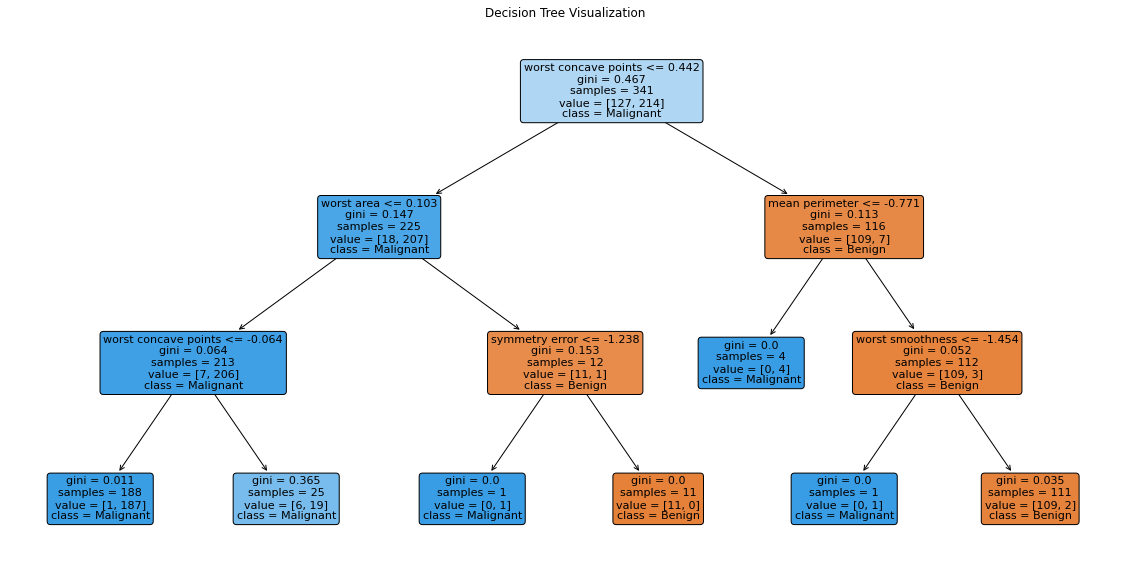

In [25]:
# 1. Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE, 
                                      max_depth=3)

# 2. Train the model on the training data
decision_tree.fit(X_train_scaled, y_train)

# 3. Make predictions on the validation set
y_val_pred_dt = decision_tree.predict(X_val_scaled)

# 4. Evaluate the model
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
precision_dt = precision_score(y_val, y_val_pred_dt)
recall_dt = recall_score(y_val, y_val_pred_dt)
f1_dt = f1_score(y_val, y_val_pred_dt)
conf_matrix_dt = confusion_matrix(y_val, y_val_pred_dt)
class_report_dt = classification_report(y_val, y_val_pred_dt)

# Print the evaluation results
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-Score: {f1_dt:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", class_report_dt)

# 5. Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=feature_names, class_names=["Benign", "Malignant"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


## Decision Tree Model Evaluation and Insights

The Decision Tree model has been evaluated on the validation set, and the results are summarized below:

### Model Performance Metrics:
- **Accuracy:** 95.61% - The model correctly classified 95.61% of the samples, indicating a strong performance in distinguishing between malignant and benign tumors.
- **Precision:** 97.14% - This high precision value means that when the model predicts a tumor as malignant, it is correct 97.14% of the time, which minimizes the number of false positives.
- **Recall:** 95.77% - The model correctly identified 95.77% of the actual malignant cases, showing its effectiveness in detecting malignancies.
- **F1-Score:** 96.45% - The F1-score, which balances precision and recall, indicates a robust model with balanced performance.

### Confusion Matrix Analysis:
- **True Positives (TP):** 68 malignant tumors were correctly classified.
- **True Negatives (TN):** 41 benign tumors were correctly classified.
- **False Positives (FP):** 2 benign tumors were incorrectly classified as malignant.
- **False Negatives (FN):** 3 malignant tumors were incorrectly classified as benign.

### Visualization Insights:
The visualization of the Decision Tree provides several key insights:

1. **Key Features:**
   - The most important feature used at the root of the tree is `worst concave points`. This feature serves as the first and most critical decision point in classifying tumors.
   - Other significant features include `worst area`, `mean perimeter`, and `worst smoothness`, which are used in subsequent splits to further refine the classification.

2. **Decision Pathways:**
   - The tree demonstrates how specific combinations of features lead to classifications. For example, a low value in `worst concave points` and `worst area` strongly indicates a malignant tumor.
   - Conversely, features like `mean perimeter` and `worst smoothness` are more indicative of benign tumors when they fall below certain thresholds.

3. **Model Complexity:**
   - The tree has several leaf nodes where decisions are made with complete certainty (gini = 0.0). This indicates that the model has found clear separations between classes based on the selected features.

### Conclusion:
The Decision Tree model exhibits strong performance with a high accuracy, precision, and recall, making it a reliable classifier for breast cancer tumors. The model's ability to clearly delineate decision paths based on key features like `worst concave points` and `worst area` is particularly valuable. However, the slight decrease in performance compared to Logistic Regression (particularly in precision and recall) suggests there might be room for further optimization, such as tuning hyperparameters or exploring ensemble methods like Random Forests.


## Understanding Hyperparameters in Decision Tree

Decision Trees have several hyperparameters that control how the tree is constructed, which can significantly impact the model’s performance. Here’s a breakdown of the key hyperparameters with intuitive examples:

1. **max_depth:**
   - **Intuitive Example:** Imagine you're trying to decide which movie to watch by asking a series of yes/no questions. The more questions you ask, the more specific your choice becomes, but if you ask too many, it becomes overly specific and may only work for a particular scenario. `max_depth` limits the number of questions (or levels) the tree can ask before it makes a decision. 
   - **When to Optimize:** If your tree is too deep, it may overfit the training data (too specific). Reducing `max_depth` can help the tree generalize better to unseen data.

2. **min_samples_split:**
   - **Intuitive Example:** Consider that you're splitting a group of people based on their preferences (e.g., action vs. comedy movies). If a group is too small, splitting it further might not be meaningful. `min_samples_split` determines the minimum number of samples required to split a node.
   - **When to Optimize:** Increasing `min_samples_split` can prevent the tree from creating overly specific splits (overfitting). It’s especially useful in noisy datasets where small groups might not represent meaningful patterns.

3. **min_samples_leaf:**
   - **Intuitive Example:** Imagine you’re deciding on vacation spots by grouping people’s preferences. You want each final group (leaf) to have a minimum number of people to make a reliable decision. `min_samples_leaf` controls the minimum number of samples required to be at a leaf node.
   - **When to Optimize:** Setting a higher `min_samples_leaf` can make the model more robust by ensuring that each decision (leaf) is based on a sufficient number of samples, reducing the chances of overfitting.

4. **max_features:**
   - **Intuitive Example:** Picture choosing a dish at a restaurant by considering only a few key factors, like price, ingredients, and cuisine type, instead of evaluating every single detail. `max_features` limits the number of features the model considers when splitting a node.
   - **When to Optimize:** Limiting `max_features` can introduce randomness into the tree building process, which often improves the model's performance, especially in ensembles like Random Forests. It’s useful when you suspect that certain features might dominate the splits.

5. **criterion (gini, entropy):**
   - **Intuitive Example:** Imagine you’re dividing a group of objects by choosing the feature that best separates them. The `criterion` determines the method used to evaluate the quality of a split. `gini` is like choosing the feature that creates the most even split, while `entropy` is like choosing the feature that creates the most ordered split.
   - **When to Optimize:** While both criteria often yield similar results, `entropy` might be more sensitive to important splits, but `gini` is computationally simpler and faster. If model performance is suboptimal, experimenting with this criterion might help.

6. **max_leaf_nodes:**
   - **Intuitive Example:** Think of it as limiting the number of final decision options in your process. If there are too many leaf nodes, the model might overfit, just like having too many decision options might confuse the process. 
   - **When to Optimize:** Setting `max_leaf_nodes` can control the growth of the tree, preventing it from becoming overly complex and helping the model generalize better.
